In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('data.csv')

# Data Exploration

In [6]:
# Display basic information about the filtered dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
# Step 1: Data Cleaning
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


C:\Users\Moham\AppData\Local\Temp\ipykernel_43032\1100736285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis', order=df['type'].value_counts().index)


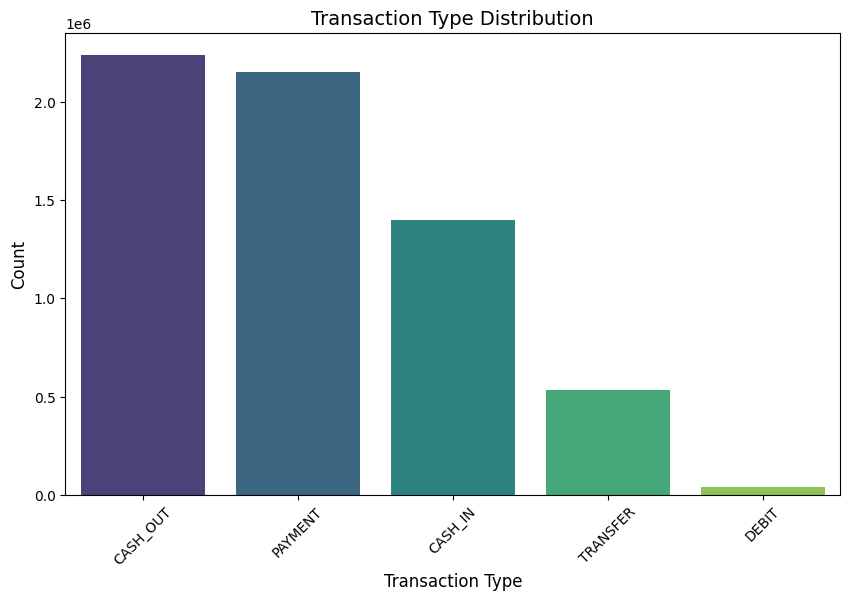

In [8]:
# Step 2: Data Overview
# Plot the distribution of all transaction types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', palette='viridis', order=df['type'].value_counts().index)
plt.title('Transaction Type Distribution', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [9]:
# the number of instance we=ith type TRANSFER are less than CASH_OUT 

C:\Users\Moham\AppData\Local\Temp\ipykernel_43032\1760264969.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='isFraud', data=fraud_counts, palette='viridis', edgecolor='black')


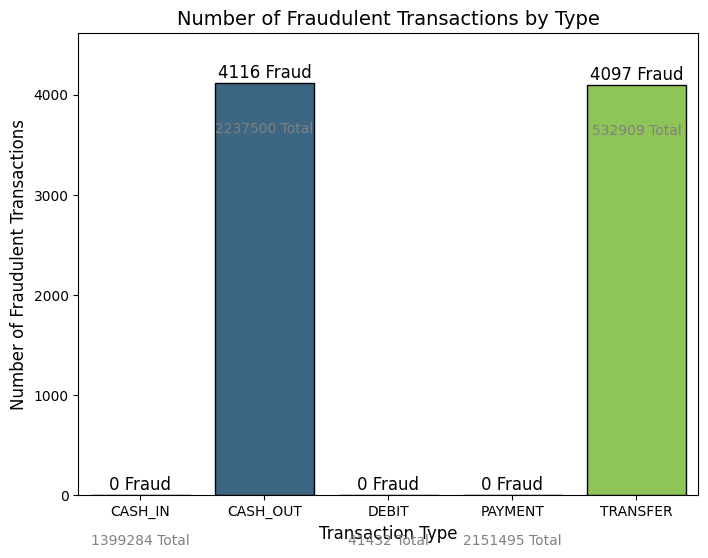

In [10]:
# Plot the number of isFraud cases in each transaction type
fraud_counts = df.groupby('type')['isFraud'].sum().reset_index()
fraud_counts['total'] = df['type'].value_counts().loc[fraud_counts['type']].values

plt.figure(figsize=(8, 6))
sns.barplot(x='type', y='isFraud', data=fraud_counts, palette='viridis', edgecolor='black')

# Annotate the bars with the total number of transactions
for index, row in fraud_counts.iterrows():
    plt.text(row.name, row.isFraud + 50, f"{int(row.isFraud)} Fraud", color='black', ha='center', fontsize=12)
    plt.text(row.name, row.isFraud - 500, f"{int(row.total)} Total", color='gray', ha='center', fontsize=10)

plt.title('Number of Fraudulent Transactions by Type', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.ylim(0, fraud_counts['isFraud'].max() + 500)
plt.show()

In [11]:
# Conclusion from the plot:
# Only 'TRANSFER' and 'CASH_OUT' transaction types have fraud cases. 
# Filter the dataset to include only these two types for further analysis.

In [12]:
df = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]


# Feature engineering

In [13]:
# 1. Difference in Balance Indicator
# Calculate the difference between debited and credited amounts
# Flag transactions with unusual differences
df['balance_difference'] = (df['oldbalanceOrg'] - df['newbalanceOrig']) - (df['newbalanceDest'] - df['oldbalanceDest'])
df['balance_flag'] = (df['balance_difference'] != 0).astype(int)

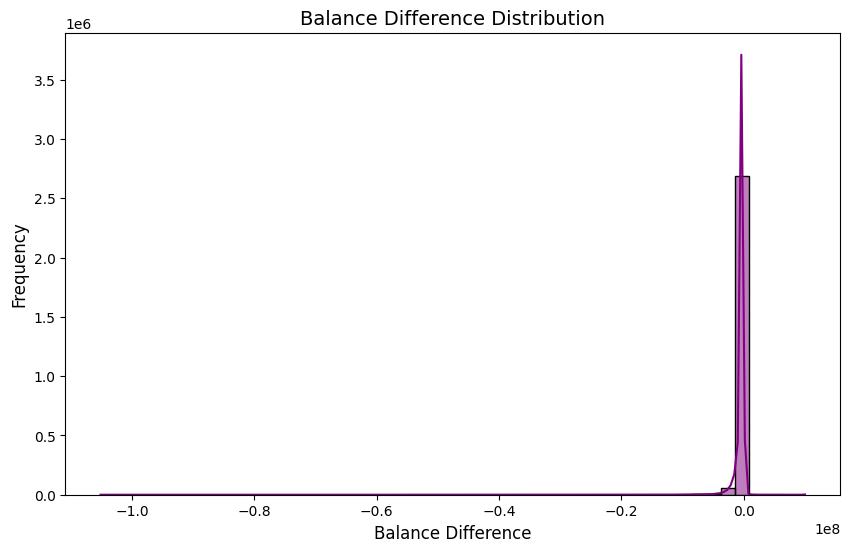

In [14]:
# Visualization of balance differences
plt.figure(figsize=(10, 6))
sns.histplot(df['balance_difference'], bins=50, kde=True, color='purple')
plt.title('Balance Difference Distribution', fontsize=14)
plt.xlabel('Balance Difference', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

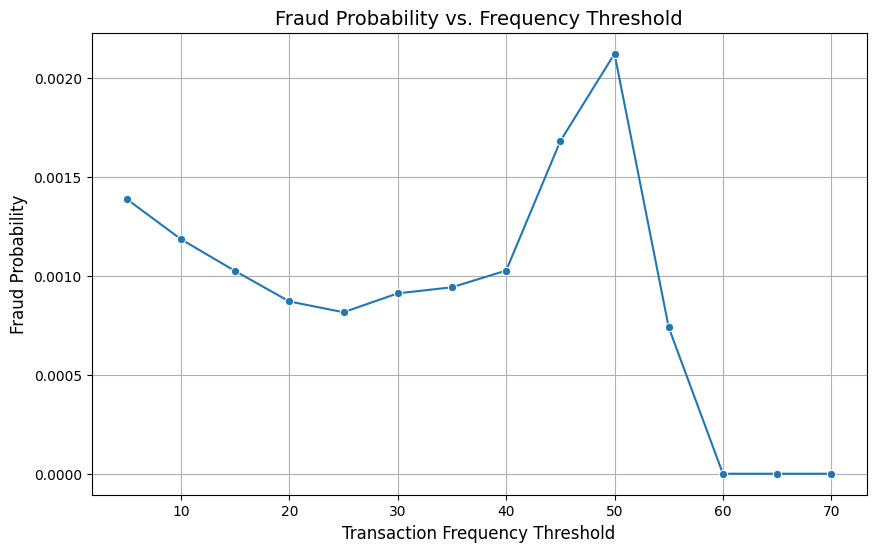

In [15]:
# Analyze frequency_flag impact
thresholds = range(5, 76, 5)  # Test thresholds from 5 to 50 with step size of 5
results = []

for threshold in thresholds:
    # Flag frequent receivers based on the threshold
    temp_flag = df['nameDest'].map(df['nameDest'].value_counts() > threshold).fillna(False).astype(int)
    fraud_probability = df[temp_flag == 1]['isFraud'].mean()
    results.append({'Threshold': threshold, 'Fraud Probability': fraud_probability})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plot fraud probability at different thresholds
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Threshold', y='Fraud Probability', marker='o')
plt.title('Fraud Probability vs. Frequency Threshold', fontsize=14)
plt.xlabel('Transaction Frequency Threshold', fontsize=12)
plt.ylabel('Fraud Probability', fontsize=12)
plt.grid(True)
plt.show()

In [16]:
# 2. Frequency Indicator
# Count the number of transactions per receiver
receiver_transaction_counts = df['nameDest'].value_counts()

# Flag receivers with more than 20 transactions
frequent_receivers = receiver_transaction_counts[(receiver_transaction_counts > 39) & (receiver_transaction_counts < 51)].index
df['frequency_flag'] = df['nameDest'].isin(frequent_receivers).astype(int)

In [17]:
receiver_transaction_counts

nameDest
C1286084959    75
C665576141     68
C1360767589    68
C97730845      67
C248609774     64
               ..
C1049862186     1
C2097692432     1
C1422239092     1
C291162245      1
C1023330867     1
Name: count, Length: 509565, dtype: int64

C:\Users\Moham\AppData\Local\Temp\ipykernel_43032\3257941153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='isFraud', y='amount', palette='coolwarm')


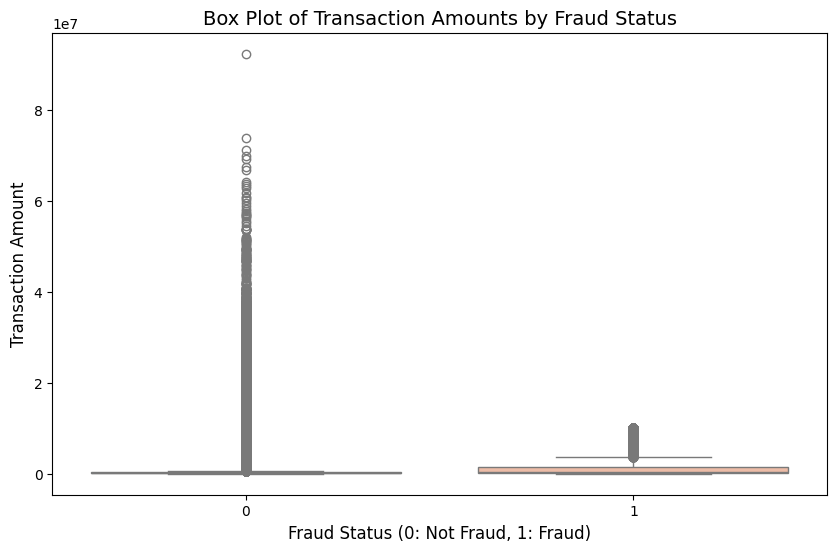

In [18]:
# Step 3: Box Plot for Surge Threshold Range
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='isFraud', y='amount', palette='coolwarm')
plt.title('Box Plot of Transaction Amounts by Fraud Status', fontsize=14)
plt.xlabel('Fraud Status (0: Not Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.show()

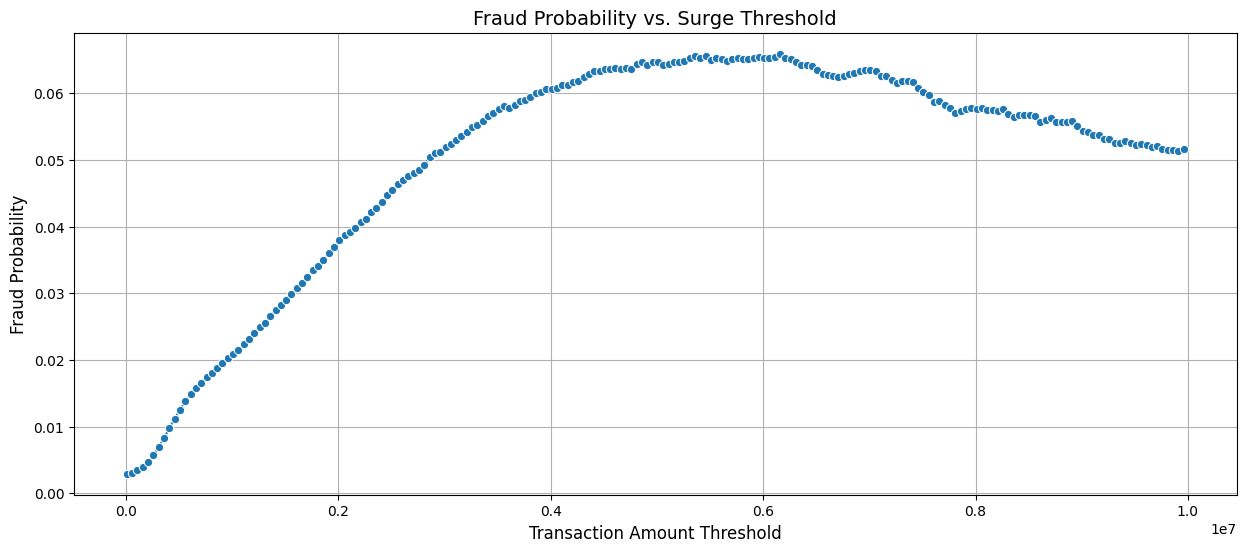

In [19]:
# Adjusted thresholds range based on the boxplot observation
thresholds = range(10000, 10000001, 50000)  # Test thresholds from 10k to 1M with step size of 25k
results = []

for threshold in thresholds:
    # Flag transactions as surge based on the threshold
    temp_flag = (df['amount'] > threshold).astype(int)
    fraud_probability = df[temp_flag == 1]['isFraud'].mean()
    results.append({'Threshold': threshold, 'Fraud Probability': fraud_probability})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plot fraud probability at different thresholds
plt.figure(figsize=(15, 6))
sns.lineplot(data=results_df, x='Threshold', y='Fraud Probability', marker='o')
plt.title('Fraud Probability vs. Surge Threshold', fontsize=14)
plt.xlabel('Transaction Amount Threshold', fontsize=12)
plt.ylabel('Fraud Probability', fontsize=12)
plt.grid(True)
plt.show()

C:\Users\Moham\AppData\Local\Temp\ipykernel_43032\4035740902.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud_amounts, label='Fraudulent Transactions', shade=True, color='red')
C:\Users\Moham\AppData\Local\Temp\ipykernel_43032\4035740902.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud_amounts, label='Non-Fraudulent Transactions', shade=True, color='blue')


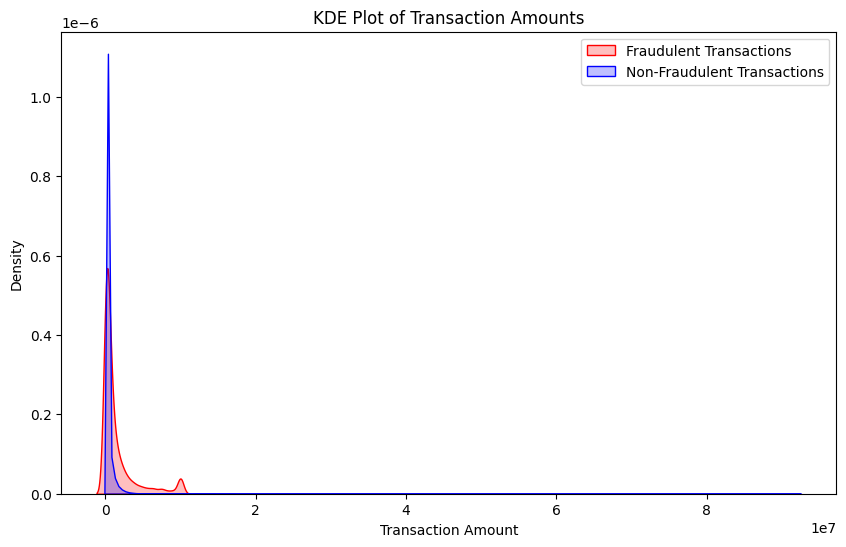

In [20]:
# Filter amounts for fraudulent and non-fraudulent transactions
fraud_amounts = df[df['isFraud'] == 1]['amount']
nonfraud_amounts = df[df['isFraud'] == 0]['amount']

# Plot KDE for fraudulent and non-fraudulent amounts
plt.figure(figsize=(10, 6))
sns.kdeplot(fraud_amounts, label='Fraudulent Transactions', shade=True, color='red')
sns.kdeplot(nonfraud_amounts, label='Non-Fraudulent Transactions', shade=True, color='blue')
plt.title('KDE Plot of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

In [21]:
# Fraudulent transactions (red curve) are concentrated at smaller transaction amounts.
#Fraudulent transactions rarely involve very large amounts.
#The range of fraudulent transaction amounts appears to be significantly smaller and skewed towards lower values.

In [22]:
fraud_transactions = df[df['isFraud'] == 1]
percentiles = fraud_transactions['amount'].quantile([0.75, 0.9, 0.95])
print("Percentiles for Fraudulent Transaction Amounts:")
print(percentiles)

Percentiles for Fraudulent Transaction Amounts:
0.75    1517771.480
0.90    4521723.512
0.95    8006429.040
Name: amount, dtype: float64


In [23]:
# Set threshold based on 95th percentile
threshold = fraud_transactions['amount'].quantile(0.75)

# Flagging amounts that are below or equal to the threshold
df['amount_flag'] = (df['amount'] >= threshold).astype(int)

# Analyze flagged transactions
flagged_summary = df.groupby('amount_flag')['isFraud'].mean()
print("Fraud Probability for Flagged Amounts:")
print(flagged_summary)


Fraud Probability for Flagged Amounts:
amount_flag
0    0.002281
1    0.029145
Name: isFraud, dtype: float64


# Modeling

### Baseline Model 

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [27]:
X = df.drop(['isFraud', 'isFlaggedFraud', 'type', 'nameOrig', 'nameDest'], axis=1, errors='ignore')
y = df['isFraud']

In [28]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
import os
import pickle

def logistic_regression(X_train, y_train, X_test, y_test, suffix="model"):

    log_reg = LogisticRegression(class_weight='balanced', solver='liblinear')
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC-AUC

    # Print evaluation metrics
    print("Logistic Regression Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Emphasize false negatives
    print("False Negatives (Fraud classified as Not Fraud):", cm[1][0])

    # Save the trained model
    model_path = os.path.join("models", f"logistic_regression_{suffix}.pkl")
    with open(model_path, "wb") as model_file:
        pickle.dump(log_reg, model_file)
    print(f"Model saved to: {model_path}")

    return log_reg


Logistic Regression Results:
Accuracy: 0.8855259690803888
ROC-AUC Score: 0.9753555404892786
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94    552436
           1       0.02      0.96      0.05      1646

    accuracy                           0.89    554082
   macro avg       0.51      0.92      0.49    554082
weighted avg       1.00      0.89      0.94    554082



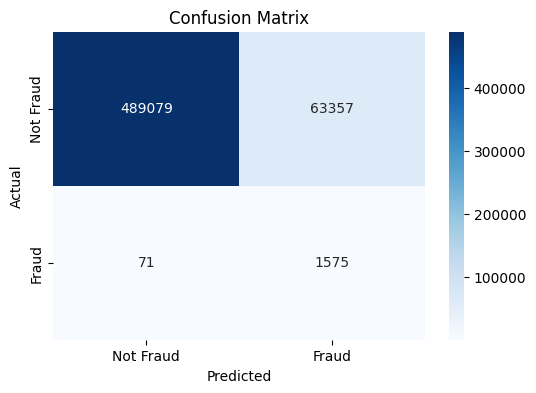

False Negatives (Fraud classified as Not Fraud): 71
Model saved to: models\logistic_regression_baseline.pkl


In [30]:
log_reg_baseline = logistic_regression(X_train,y_train,X_test,y_test,'baseline')

In [31]:
# this is the baseline model with FN = 71 , FP = 63357 , next we will try to improve the result using different approach

In [32]:
transfer_count = df[df['type'] == 'TRANSFER'].shape[0]
print(f"Number of samples with type 'TRANSFER': {transfer_count}")
fraud_transfer_count = df[(df['type'] == 'TRANSFER') & (df['isFraud'] == 1)].shape[0]
print(f"Number of fraud cases with type 'TRANSFER': {fraud_transfer_count}")

print(f"Rate of fraud in the transfer data {fraud_transfer_count/transfer_count} ")

Number of samples with type 'TRANSFER': 532909
Number of fraud cases with type 'TRANSFER': 4097
Rate of fraud in the transfer data 0.007687991758442811 


In [33]:
cashout_count = df[df['type'] == 'CASH_OUT'].shape[0]
print(f"Number of samples with type 'CASHOUT': {cashout_count}")
fraud_cashout_count = df[(df['type'] == 'CASH_OUT') & (df['isFraud'] == 1)].shape[0]
print(f"Number of fraud cases with type 'CASHOUT': {fraud_cashout_count}")
print(f"Rate of fraud in the cashout data {fraud_cashout_count/cashout_count} ")

Number of samples with type 'CASHOUT': 2237500
Number of fraud cases with type 'CASHOUT': 4116
Rate of fraud in the cashout data 0.0018395530726256983 


In [34]:
# We will explore the transfer data and apply a baseline model because it has a higher fraud rate (0.0077) and is more balanced compared to the cashout data (0.0018).

### Work on tranfer and cash_out transaction seperately

In [35]:
# Split the dataset into two parts: TRANSFER and CASH_OUT
df_transfer = df[df['type'] == 'TRANSFER']
df_cashout = df[df['type'] == 'CASH_OUT']

# logisitic regression on Transfer Data 

In [36]:
X_transfer = df_transfer.drop(['isFraud', 'isFlaggedFraud', 'type', 'nameOrig', 'nameDest'], axis=1, errors='ignore')
y_transfer = df_transfer['isFraud']

In [37]:
scaler = StandardScaler()
X_transfer_scaled = scaler.fit_transform(X_transfer)
X_train, X_test, y_train, y_test = train_test_split(X_transfer_scaled, y_transfer, test_size=0.2, random_state=42)

Logistic Regression Results:
Accuracy: 0.9747330693738154
ROC-AUC Score: 0.9981901917662664
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    105775
           1       0.23      1.00      0.37       807

    accuracy                           0.97    106582
   macro avg       0.61      0.98      0.68    106582
weighted avg       0.99      0.97      0.98    106582



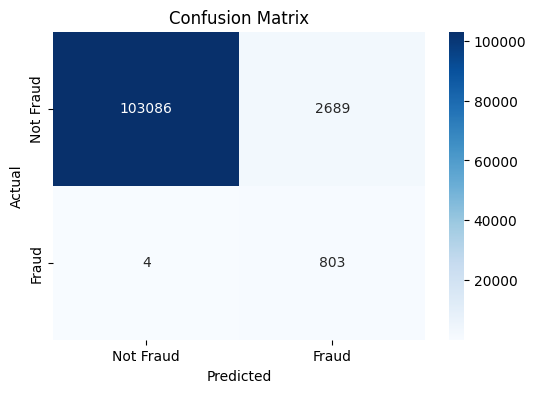

False Negatives (Fraud classified as Not Fraud): 4
Model saved to: models\logistic_regression_transfer.pkl


In [38]:
log_reg_transfer = logistic_regression(X_train,y_train,X_test,y_test,'transfer')

In [39]:
## the results are improved with only 3 FN , but FP = 2136 are big so we will keep improving the results 

In [40]:
# Next we will try to subsample the data and keep using the same model 

### logisitic regression on Transfer Data with SMOTE  

In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [43]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


Logistic Regression Results:
Accuracy: 0.9789833180086693
ROC-AUC Score: 0.99827133006894
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    105775
           1       0.26      0.99      0.42       807

    accuracy                           0.98    106582
   macro avg       0.63      0.99      0.70    106582
weighted avg       0.99      0.98      0.98    106582



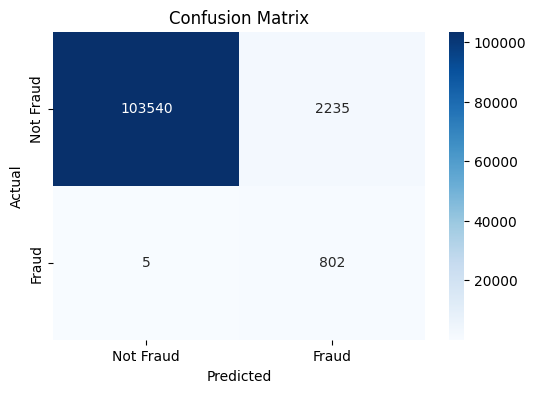

False Negatives (Fraud classified as Not Fraud): 5
Model saved to: models\logistic_regression_transfer_smote.pkl


In [44]:
log_reg_smote = logistic_regression(X_train_smote,y_train_smote,X_test,y_test,'transfer_smote')

In [45]:
## the results are improved with only 5 FN , but FP = 2235 are big so we will keep improving the results 
## that means that with balanced data the model performs well , here we figure out that smote is a good approach 

In [46]:
## since we have a balanced data with smote technique we will try to use cross validation to train the model with the subsampled data 

In [47]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict


def logistic_regression_with_cv(X_train, y_train, X_test, y_test, k=5,suffix='model'):
    # Initialize Logistic Regression model
    log_reg = LogisticRegression(class_weight='balanced', solver='liblinear')

    # K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Cross-validation scores
    accuracy_scores = cross_val_score(log_reg, X_train, y_train, cv=kf, scoring='accuracy')
    roc_auc_scores = cross_val_score(log_reg, X_train, y_train, cv=kf, scoring='roc_auc')
    y_train_pred = cross_val_predict(log_reg, X_train, y_train, cv=kf, method='predict')
    y_train_pred_proba = cross_val_predict(log_reg, X_train, y_train, cv=kf, method='predict_proba')[:, 1]

    # Print cross-validation metrics
    print("Logistic Regression with Cross-Validation Results (Training Data):")
    print(f"Mean Accuracy (CV): {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
    print(f"Mean ROC-AUC Score (CV): {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}")
    print("\nClassification Report (Training Data):\n", classification_report(y_train, y_train_pred))

    # Evaluate the model on the test set
    log_reg.fit(X_train, y_train)
    y_test_pred = log_reg.predict(X_test)
    y_test_pred_proba = log_reg.predict_proba(X_test)[:, 1]

    # Test set evaluation metrics
    print("\nLogistic Regression Results (Test Data):")
    print("Accuracy (Test):", accuracy_score(y_test, y_test_pred))
    print("ROC-AUC Score (Test):", roc_auc_score(y_test, y_test_pred_proba))
    print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))

    # Confusion matrix for the test set
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Test Data)')
    plt.show()

    # Emphasize false negatives
    print("False Negatives (Fraud classified as Not Fraud):", cm[1][0])

    print(f"Mean Accuracy (CV): {np.mean(accuracy_scores):.4f}")
    print(f"Mean ROC-AUC Score (CV): {np.mean(roc_auc_scores):.4f}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Test ROC-AUC Score: {roc_auc_score(y_test, y_test_pred_proba):.4f}")

        # Save the trained model
    model_path = os.path.join("models", f"logistic_regression_cv_{suffix}.pkl")
    with open(model_path, "wb") as model_file:
        pickle.dump(log_reg, model_file)
    print(f"Model saved to: {model_path}")

    return log_reg




In [48]:
smote_cv = SMOTE(random_state=42)

In [49]:
scaler = StandardScaler()
X_transfer_scaled = scaler.fit_transform(X_transfer)

In [50]:
X_smote, y_smote = smote_cv.fit_resample(X_transfer_scaled, y_transfer)


Logistic Regression with Cross-Validation Results (Training Data):
Mean Accuracy (CV): 0.9882 ± 0.0003
Mean ROC-AUC Score (CV): 0.9990 ± 0.0000

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    423037
           1       0.98      1.00      0.99    423037

    accuracy                           0.99    846074
   macro avg       0.99      0.99      0.99    846074
weighted avg       0.99      0.99      0.99    846074


Logistic Regression Results (Test Data):
Accuracy (Test): 0.9789833180086693
ROC-AUC Score (Test): 0.99827133006894
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    105775
           1       0.26      0.99      0.42       807

    accuracy                           0.98    106582
   macro avg       0.63      0.99      0.70    106582
weighted avg       0.99      0.98      0.98    106582



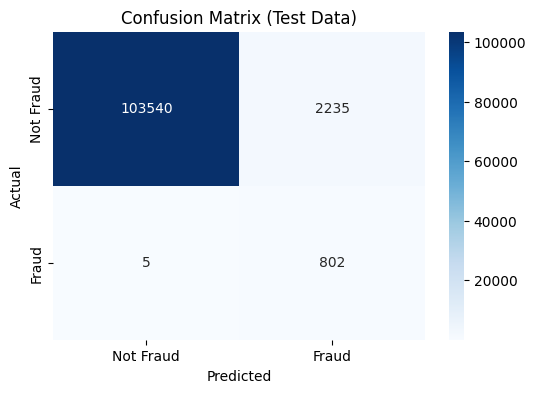

False Negatives (Fraud classified as Not Fraud): 5
Mean Accuracy (CV): 0.9882
Mean ROC-AUC Score (CV): 0.9990
Test Accuracy: 0.9790
Test ROC-AUC Score: 0.9983
Model saved to: models\logistic_regression_cv_transfer_smote.pkl


In [51]:
log_reg_smote_cv = logistic_regression_with_cv(X_train_smote, y_train_smote,X_test,y_test, k=5,suffix ='transfer_smote')

In [52]:
# The fact that we obtained the same results for false negatives (FN) and false positives (FP) with and without cross-validation suggests that the cross-validation process is effectively identifying the optimal model,
#  consistent with the results achieved without it.

In [53]:
# we will keep improving the result and inspiring from a research paper we will use use PCA and will train a model on the PCA data 

### PCA Component

In [54]:
scaler = StandardScaler()
X_transfer_scaled = scaler.fit_transform(X_transfer)

In [55]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
principal_components_transfer = pca.fit_transform(X_transfer_scaled)

# Convert to DataFrame
pca_df_transfer = pd.DataFrame(data=principal_components_transfer, columns=['PC 1', 'PC 2'])

# Add labels for fraud/non-fraud
pca_df_transfer['isFraud'] = y_transfer.reset_index(drop=True)

# Separate Fraud and Non-Fraud for visualization
fraud_transfer = pca_df_transfer[pca_df_transfer['isFraud'] == 1]
non_fraud_transfer = pca_df_transfer[pca_df_transfer['isFraud'] == 0]

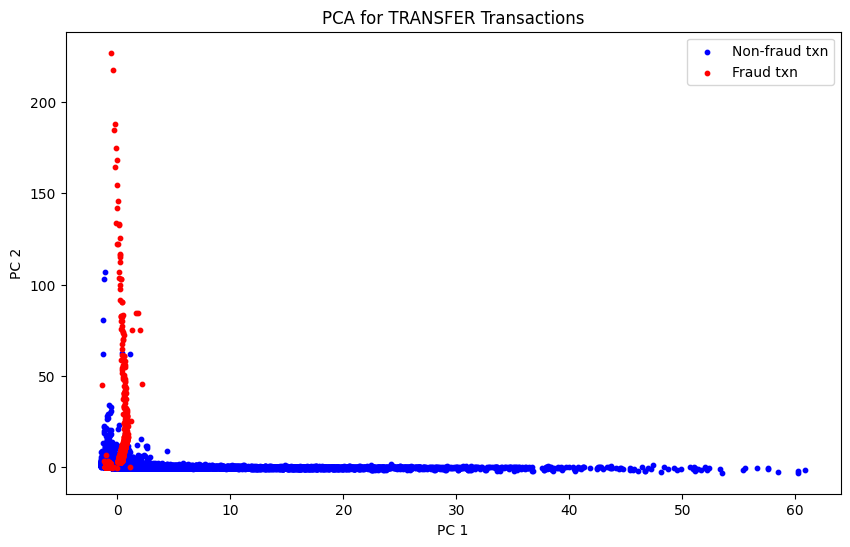

In [56]:
# Plot PCA scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(non_fraud_transfer['PC 1'], non_fraud_transfer['PC 2'], color='blue', label='Non-fraud txn', s=10)
plt.scatter(fraud_transfer['PC 1'], fraud_transfer['PC 2'], color='red', label='Fraud txn', s=10)
plt.title('PCA for TRANSFER Transactions')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

In [57]:
# The graph demonstrates the suitability of using logistic regression, as the data appears to be linearly separable.

In [58]:
# we will train the model on the new dataframe with the pca components 

In [59]:
X_train, X_test, y_train, y_test = train_test_split(pca_df_transfer, y_transfer, test_size=0.2, random_state=42)

Logistic Regression Results:
Accuracy: 0.9999906175526825
ROC-AUC Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105775
           1       1.00      1.00      1.00       807

    accuracy                           1.00    106582
   macro avg       1.00      1.00      1.00    106582
weighted avg       1.00      1.00      1.00    106582



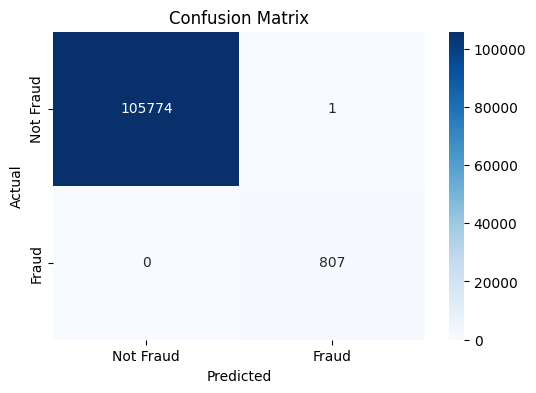

False Negatives (Fraud classified as Not Fraud): 0
Model saved to: models\logistic_regression_transfer_pca.pkl


In [60]:
log_reg_pca = logistic_regression(X_train,y_train,X_test,y_test,'transfer_pca')

In [61]:
# Here we got the most improved model with FN = 0 , and FP = 1 
# next we will go to explore the next part of the data which type is cashout 

# Modeling CASH_OUT Data

In [62]:
cashout_count = df[df['type'] == 'CASH_OUT'].shape[0]
print(f"Number of samples with type 'CASHOUT': {cashout_count}")
fraud_cashout_count = df[(df['type'] == 'CASH_OUT') & (df['isFraud'] == 1)].shape[0]
print(f"Number of fraud cases with type 'CASHOUT': {fraud_cashout_count}")
print(f"Rate of fraud in the cashout data {fraud_cashout_count/cashout_count} ")

Number of samples with type 'CASHOUT': 2237500
Number of fraud cases with type 'CASHOUT': 4116
Rate of fraud in the cashout data 0.0018395530726256983 


In [63]:
# Here we have the rate of fraud samples in the data is almost 2% , so we will use models that perform well on this kind of data 

In [64]:
# we will start with random forest since it gives weights to the iimpbalanced data  hence we solve the problem
# Moving forward, we will continue using cross-validation to ensure robust and reliable model performance.

### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_with_cv(X_train, y_train, X_test, y_test, k=5, n_estimators=10,suffix = 'model'):

    # Initialize Random Forest model
    rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=n_estimators)

    # K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Cross-validation scores
    accuracy_scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring='accuracy')
    roc_auc_scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring='roc_auc')
    y_train_pred = cross_val_predict(rf, X_train, y_train, cv=kf, method='predict')
    y_train_pred_proba = cross_val_predict(rf, X_train, y_train, cv=kf, method='predict_proba')[:, 1]

    # Print cross-validation metrics
    print("Random Forest with Cross-Validation Results (Training Data):")
    print(f"Mean Accuracy (CV): {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
    print(f"Mean ROC-AUC Score (CV): {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}")
    print("\nClassification Report (Training Data):\n", classification_report(y_train, y_train_pred))

    # Evaluate the model on the test set
    rf.fit(X_train, y_train)
    y_test_pred = rf.predict(X_test)
    y_test_pred_proba = rf.predict_proba(X_test)[:, 1]

    # Test set evaluation metrics
    print("\nRandom Forest Results (Test Data):")
    print("Accuracy (Test):", accuracy_score(y_test, y_test_pred))
    print("ROC-AUC Score (Test):", roc_auc_score(y_test, y_test_pred_proba))
    print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))

    # Confusion matrix for the test set
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Test Data)')
    plt.show()

    # Emphasize false negatives
    print("False Negatives (Fraud classified as Not Fraud):", cm[1][0])
    # Save the trained model
    model_path = os.path.join("models", f"random_forest_{suffix}.pkl")
    with open(model_path, "wb") as model_file:
        pickle.dump(rf, model_file)
    print(f"Model saved to: {model_path}")

    return rf


In [66]:
# class_weight='balanced' automatically adjusts weights to handle imbalanced data.
# n_estimators=100 uses 100 trees in the forest

In [103]:
X_cashout = df_cashout.drop(['isFraud', 'isFlaggedFraud', 'type', 'nameOrig', 'nameDest'], axis=1, errors='ignore')
y_cashout = df_cashout['isFraud']

In [104]:
scaler = StandardScaler()
X_cashout_scaled = scaler.fit_transform(X_cashout)
X_train, X_test, y_train, y_test = train_test_split(X_cashout_scaled, y_cashout, test_size=0.2, random_state=42)

Random Forest with Cross-Validation Results (Training Data):
Mean Accuracy (CV): 0.9999 ± 0.0000
Mean ROC-AUC Score (CV): 0.9893 ± 0.0029

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1786721
           1       1.00      0.97      0.98      3279

    accuracy                           1.00   1790000
   macro avg       1.00      0.98      0.99   1790000
weighted avg       1.00      1.00      1.00   1790000


Random Forest Results (Test Data):
Accuracy (Test): 0.9999351955307263
ROC-AUC Score (Test): 0.9874491747753633
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    446663
           1       1.00      0.97      0.98       837

    accuracy                           1.00    447500
   macro avg       1.00      0.98      0.99    447500
weighted avg       1.00      1.00      1.00    447500



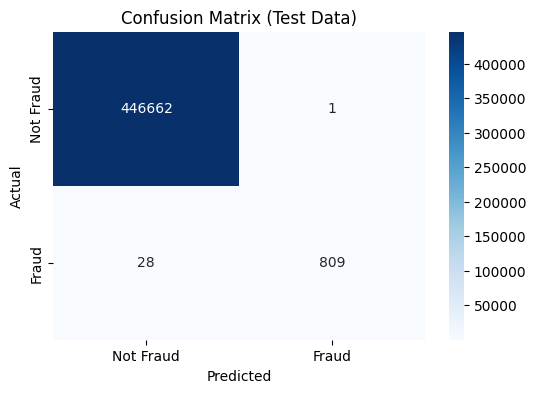

False Negatives (Fraud classified as Not Fraud): 28
Model saved to: models\random_forest_model.pkl


In [69]:
rf = random_forest_with_cv(X_train, y_train, X_test, y_test, k=5)

In [70]:
# the result here shows that the random forest perform well with FN = 28 and FP = 1
# we will keep improving that using xgboost 

Random Forest with Cross-Validation Results (Training Data):
Mean Accuracy (CV): 0.9999 ± 0.0000
Mean ROC-AUC Score (CV): 0.9905 ± 0.0025

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1786721
           1       1.00      0.97      0.98      3279

    accuracy                           1.00   1790000
   macro avg       1.00      0.99      0.99   1790000
weighted avg       1.00      1.00      1.00   1790000


Random Forest Results (Test Data):
Accuracy (Test): 0.9999374301675977
ROC-AUC Score (Test): 0.9886370516426242
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    446663
           1       1.00      0.97      0.98       837

    accuracy                           1.00    447500
   macro avg       1.00      0.98      0.99    447500
weighted avg       1.00      1.00      1.00    447500



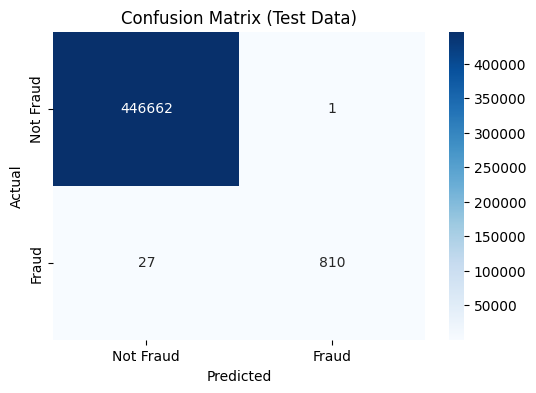

False Negatives (Fraud classified as Not Fraud): 27
Model saved to: models\random_forest_model.pkl


In [105]:
rf = random_forest_with_cv(X_train, y_train, X_test, y_test, k=5,n_estimators=30)

### XGBOOST

In [73]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix



def xgboost(X_train, y_train,X_test,y_test,suffix ='model'):
    # Initialize and train XGBoost model
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train, y_train)

    # Make predictions
    y_pred = xgb.predict(X_test)
    y_pred_proba = xgb.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC-AUC

    # Print evaluation metrics
    print("XGBoost Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Emphasize false negatives
    print("False Negatives (Fraud classified as Not Fraud):", cm[1][0])
        # Save the trained model
    model_path = os.path.join("models", f"xgboost_cashout{suffix}.pkl")
    with open(model_path, "wb") as model_file:
        pickle.dump(xgb, model_file)
    print(f"Model saved to: {model_path}")
    return xgb


c:\Users\Moham\OneDrive\Bureau\Eurecom\Malis\Project\myenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:51:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
Accuracy: 0.9997072625698324
ROC-AUC Score: 0.9996140047487845
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    446663
           1       0.93      0.91      0.92       837

    accuracy                           1.00    447500
   macro avg       0.97      0.96      0.96    447500
weighted avg       1.00      1.00      1.00    447500



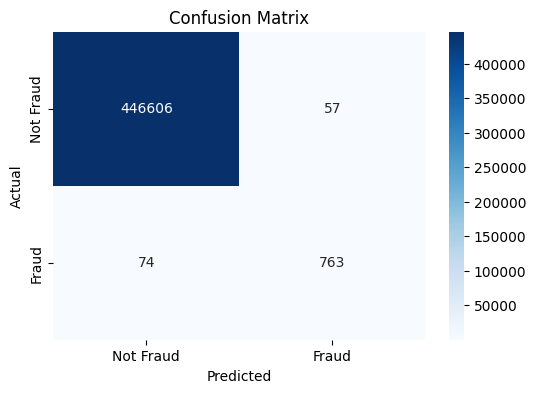

False Negatives (Fraud classified as Not Fraud): 74
Model saved to: models\xgboost_cashoutmodel.pkl


In [74]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="xgboost")

xgb = xgboost(X_train, y_train, X_test, y_test)

In [96]:
import lightgbm as lgb


def train_lightgbm(X_train, y_train, X_val, y_val):

    # Create LightGBM dataset
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

    # Set parameters
    params = {
        'objective': 'binary',  # Binary classification
        'metric': 'auc',        # Evaluate using AUC
        'is_unbalance': True,   # Handle imbalanced data
        'boosting_type': 'gbdt',
        'learning_rate': 0.05,
        'num_leaves': 31,
        'max_depth': -1,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'verbosity': -1
    }

    # Train the model
    model = lgb.train(
        params,
        train_data,
        valid_sets=[train_data, val_data],
        num_boost_round=500)

    model_path = os.path.join("models", f"lightgbm_cashout.pkl")
    with open(model_path, "wb") as model_file:
        pickle.dump(xgb, model_file)
    print(f"Model saved to: {model_path}")
    return model


In [97]:
scaler = StandardScaler()
X_cashout_scaled = scaler.fit_transform(X_cashout)
X_train, X_test, y_train, y_test = train_test_split(X_cashout_scaled, y_cashout, test_size=0.2, random_state=42)

In [98]:
lightgbm = train_lightgbm(X_train, y_train, X_test, y_test)

Model saved to: models\lightgbm_cashout.pkl


Confusion Matrix:
[[436731   9932]
 [    44    793]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    446663
           1       0.07      0.95      0.14       837

    accuracy                           0.98    447500
   macro avg       0.54      0.96      0.56    447500
weighted avg       1.00      0.98      0.99    447500



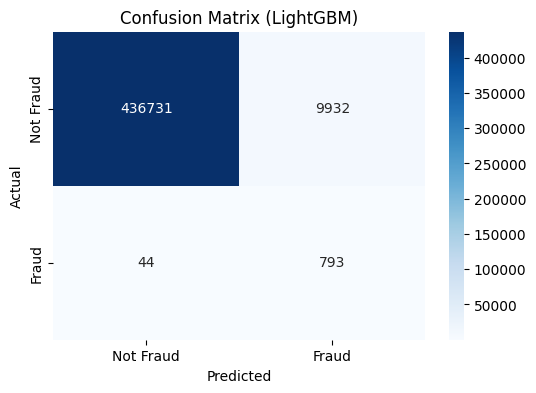

In [100]:
    # Generate predictions
y_pred_lgbm = (lightgbm.predict(X_test) > 0.5).astype(int)

    # Confusion matrix
cm = confusion_matrix(y_test, y_pred_lgbm)

    # Print confusion matrix
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm))

    # Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LightGBM)')
plt.show()

In [ ]:
# Here we will test logistic recursion in order to compare the performance with the other model 

Logistic Regression with Cross-Validation Results (Training Data):
Mean Accuracy (CV): 0.9738 ± 0.0011
Mean ROC-AUC Score (CV): 0.9948 ± 0.0014

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99   1786721
           1       0.06      0.98      0.12      3279

    accuracy                           0.97   1790000
   macro avg       0.53      0.98      0.55   1790000
weighted avg       1.00      0.97      0.99   1790000


Logistic Regression Results (Test Data):
Accuracy (Test): 0.9740424581005587
ROC-AUC Score (Test): 0.9921454124385353
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    446663
           1       0.07      0.97      0.12       837

    accuracy                           0.97    447500
   macro avg       0.53      0.97      0.56    447500
weighted avg       1.00      0.97      0.99    447500



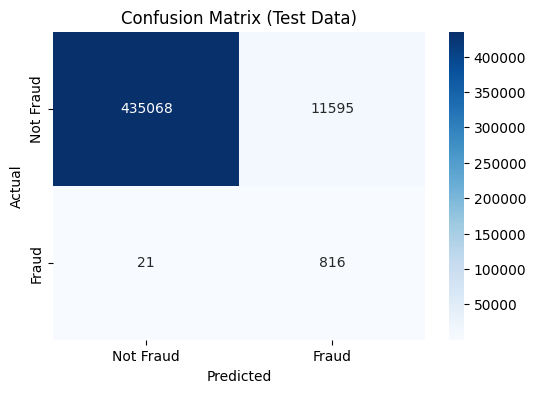

False Negatives (Fraud classified as Not Fraud): 21
Mean Accuracy (CV): 0.9738
Mean ROC-AUC Score (CV): 0.9948
Test Accuracy: 0.9740
Test ROC-AUC Score: 0.9921
Model saved to: models\logistic_regression_cv_model.pkl


In [110]:
log_reg_cashout = logistic_regression_with_cv(X_train,y_train,X_test,y_test)

In [ ]:
#now we have 4 trained models so we will use the ensemble learning technique based on the vote and compare the perfomance with the other models

# Applying Ensemble Learning using the four models based on the vote 

In [112]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def ensemble_voting_model(X_test, y_test, rf, xgb, lgbm_model,lg):

    # Make predictions using Random Forest
    y_pred_rf = rf.predict(X_test)

    # Make predictions using XGBoost
    y_pred_xgb = xgb.predict(X_test)

    # Make predictions using LightGBM
    y_pred_lgbm = (lgbm_model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions

    y_pred_lg = lg.predict(X_test)

    # Ensemble Voting: Hard Voting
    predictions = np.array([y_pred_rf, y_pred_xgb, y_pred_lgbm,y_pred_lg])
    y_pred_ensemble = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

    # Evaluate the ensemble model
    print("=== Ensemble Voting Model Results ===")
    print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_ensemble))
    print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_ensemble)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Ensemble Voting Model)')
    plt.show()

    # Emphasize false negatives
    print("False Negatives (Fraud classified as Not Fraud):", cm[1][0])



=== Ensemble Voting Model Results ===
Accuracy: 0.9999106145251396
ROC-AUC Score: 0.9790863981601561
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    446663
           1       0.99      0.96      0.98       837

    accuracy                           1.00    447500
   macro avg       1.00      0.98      0.99    447500
weighted avg       1.00      1.00      1.00    447500



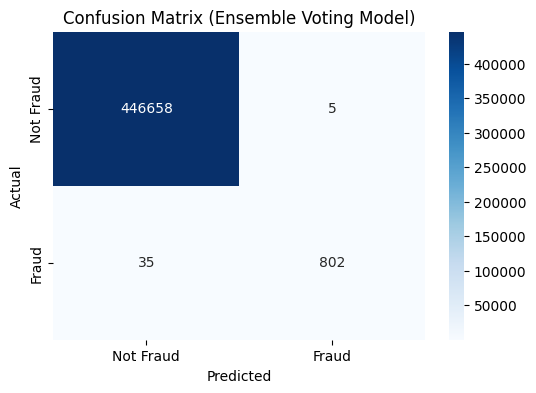

False Negatives (Fraud classified as Not Fraud): 35


In [114]:
ensemble_voting_model(X_test, y_test, rf, xgb, lightgbm,log_reg_cashout)


In [121]:
# Here we found that the ensemble learning using vote technique is not a good approach so we will hold in the use of one best model so we will plot precision_recall curve to choose one

# Comparing the Models 

In [116]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall(models, X_test, y_test, trained_models):

    plt.figure(figsize=(10, 8))
    
    for model_name, model in zip(models, trained_models):
        if model_name == 'Logistic Regression':
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_proba = model.predict(X_test) if hasattr(model, 'predict_proba') else model.predict(X_test)
        
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, label=f'{model_name}')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve Comparison')
    plt.legend(loc='upper right')
    plt.show()


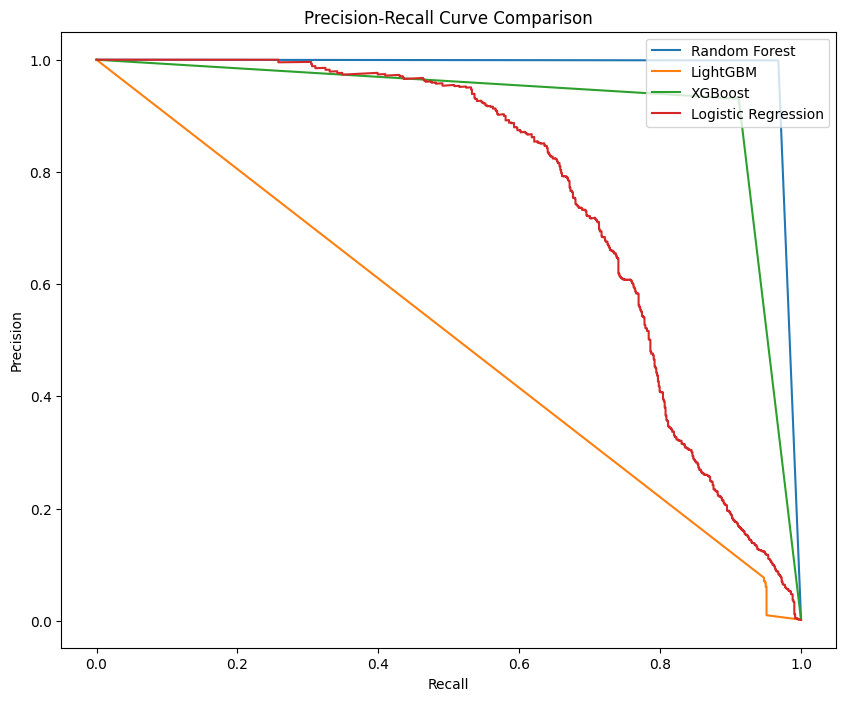

In [117]:
models = ['Random Forest', 'LightGBM', 'XGBoost', 'Logistic Regression']
trained_models = [rf, lightgbm, xgb, log_reg_cashout]  # Replace with your trained models

plot_precision_recall(models, X_test, y_test, trained_models)


In [122]:
# here we figure out that the best models are xgboost and random forest with a flavor of random forest 